In [ ]:
from keras.datasets import mnist
import pickle
import gzip
import os
import os
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import to_categorical
import tensorflow as tf
from keras.models import Sequential, load_model
import cv2
from keras.optimizers import SGD,Adam
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.applications.resnet50 import ResNet50
import tensorflow as tf
from matplotlib import pyplot as plt

from operator import mod
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D,Activation
from keras.models import Sequential
from keras.utils.np_utils import to_categorical  # convert to one-hot-encoding
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Model
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import *
(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# New Section

In [ ]:
X_raw.shape

(60000, 28, 28)

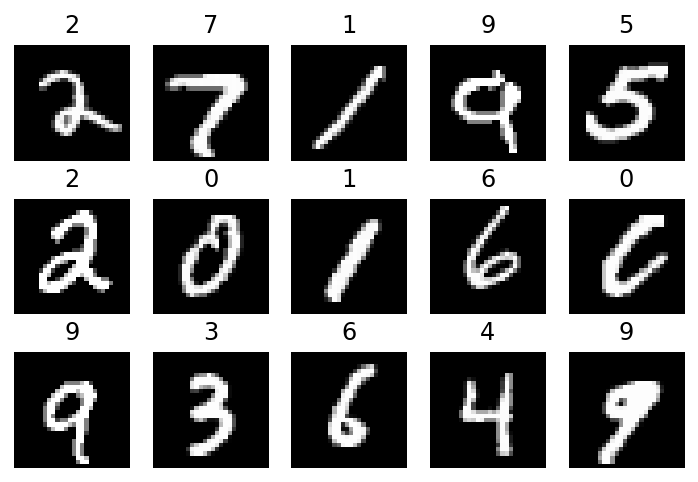

In [ ]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

In [ ]:
def resize_images(img_vector):
    resized_vector=[]

    for x in img_vector:
        x = cv2.resize(x.astype('float32'),(32,32))
        resized_vector.append(x)
    return resized_vector

In [ ]:
X_raw=np.array(resize_images(X_raw))
X_raw_test=np.array(resize_images(X_raw_test))

In [ ]:

import numpy as np

n_class, n_len, width, height = 11, 10, 32, 32          #n_class=11 because there may be a blank

def generate_dataset(X, y):
    X_len = X.shape[0]
    X_gen = np.zeros((X_len, height, width*n_len, 3), dtype=np.uint8)
    y_gen = [np.zeros((n_len, n_class), dtype=np.uint8) for i in range(X_len)]
#     y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # generate random numbers of digits
    n_digit=random.randint(1,6)
    for j in range(X_len):
        n_digit=random.randint(1,10)
        for i in range(n_digit):
            index=random.randint(0,X_len-1)
            image=X[index]
            label=y[index]
            X_gen[j][:,i*width:width+i*width,0]=image
            X_gen[j][:,i*width:width+i*width,1]=image
            X_gen[j][:,i*width:width+i*width,2]=image

            y_gen[j][i][label]=1
#             y_gen[i][j][label]=1
        for i in range(n_digit,n_len):
            y_gen[j][i][10]=1
#             y_gen[i][j][10]=1
    return X_gen, y_gen

X_train_m, y_train_m = generate_dataset(X_raw, y_raw)
X_test_m, y_test_m = generate_dataset(X_raw_test, y_raw_test)
X_raw=X_raw.reshape(n_train,width,height,1)
Y_raw=np.zeros((n_train,n_class))
for i in range(n_train):
    Y_raw[i][y_raw[i]]=1

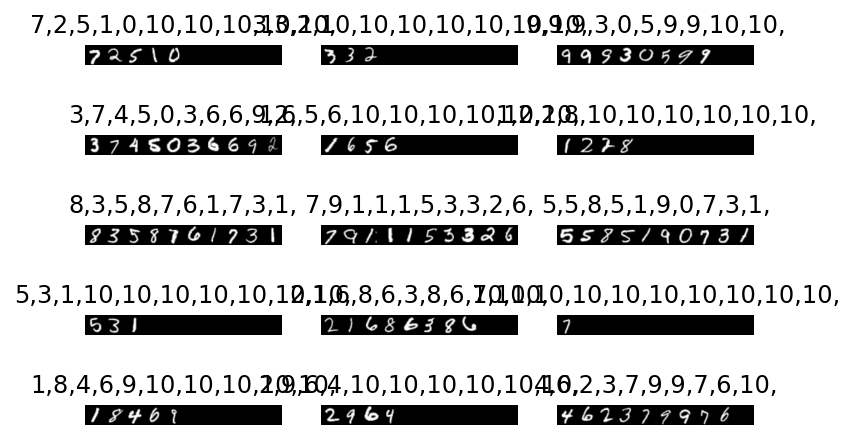

In [ ]:

# visualize the digit sequence generated
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test_m[index][j])) + ','
    
    plt.title(title)
    plt.imshow(X_test_m[index][:,:,0], cmap='gray')
    plt.axis('off')

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import os
!wget https://keras.io/api/applications/resnet/#resnet50-function

--2021-03-01 11:47:35--  https://keras.io/api/applications/resnet/
Resolving keras.io (keras.io)... 13.224.30.126, 13.224.30.12, 13.224.30.15, ...
Connecting to keras.io (keras.io)|13.224.30.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29490 (29K) [text/html]
Saving to: ‘index.html’

index.html          100%[===================>]  28.80K  --.-KB/s    in 0.001s  

2021-03-01 11:47:35 (32.2 MB/s) - ‘index.html’ saved [29490/29490]



In [ ]:
filepath='/content/gdrive/My Drive/acv_assignment1/weights_2/model1.h5'

In [ ]:
Resnet50 =tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,320,3),
    pooling=None
)
res = Sequential()
res.add(Resnet50)
res.add(Flatten())

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
res.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 10, 2048)       23587712  
_________________________________________________________________
flatten (Flatten)            (None, 20480)             0         
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
_________________________________________________________________


**Multi - Output CNN Model**

In [ ]:
node=32
a=Input(shape=(32,320,3))

x = res(a)
x=Dropout(0.5)(x)
x_1=Dense(node,activation='relu')(x)          #connect the flatten layer to five classifier,each one comes to a digit.
x_2=Dense(node,activation='relu')(x)
x_3=Dense(node,activation='relu')(x)
x_4=Dense(node,activation='relu')(x)
x_5=Dense(node,activation='relu')(x)
x_6=Dense(node,activation='relu')(x)          #connect the flatten layer to five classifier,each one comes to a digit.
x_7=Dense(node,activation='relu')(x)
x_8=Dense(node,activation='relu')(x)
x_9=Dense(node,activation='relu')(x)
x_10=Dense(node,activation='relu')(x)


d1=Dense(n_class,activation='softmax')(x_1)
d1=tf.expand_dims(d1,axis=1)
d2=Dense(n_class,activation='softmax')(x_2)
d2=tf.expand_dims(d2,axis=1)
d3=Dense(n_class,activation='softmax')(x_3)
d3=tf.expand_dims(d3,axis=1)
d4=Dense(n_class,activation='softmax')(x_4)
d4=tf.expand_dims(d4,axis=1)
d5=Dense(n_class,activation='softmax')(x_5)
d5=tf.expand_dims(d5,axis=1)
d6=Dense(n_class,activation='softmax')(x_6)
d6=tf.expand_dims(d6,axis=1)
d7=Dense(n_class,activation='softmax')(x_7)
d7=tf.expand_dims(d7,axis=1)
d8=Dense(n_class,activation='softmax')(x_8)
d8=tf.expand_dims(d8,axis=1)
d9=Dense(n_class,activation='softmax')(x_9)
d9=tf.expand_dims(d9,axis=1)
d10=Dense(n_class,activation='softmax')(x_10)
d10=tf.expand_dims(d10,axis=1)

# outputs=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10]
outputs = Concatenate(axis=1)([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10])
model=Model(inputs=a,outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: ignored

**CNN+LSTM Model**

In [ ]:
n_class = 11

a=Input(shape=(32,320,3))
x = res(a)
# x=Dropout(0.5)(x)
x = Reshape((1,20480))(x)
x = Concatenate(axis=1)([x,x,x,x,x,x,x,x,x,x])
# x = RepeatVector(10)
x = LSTM(128, activation='relu', input_shape=(10, 20480), return_sequences=True)(x)
x = LSTM(64, activation='relu', input_shape=(10, 20480), return_sequences=True)(x)
x = LSTM(11, activation='softmax', return_sequences=True)(x)

model=Model(inputs=a,outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print('Model Details are : ')
print(model.summary())

Model Details are : 


NameError: ignored

In [ ]:
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', savebest_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, epsilon=1e-4, mode='min')

In [ ]:
y_train_m = np.array(y_train_m)

y_test_m = np.array(y_test_m)
y_test_m.shape

(10000, 10, 11)

In [ ]:
# model = load_model(filepath)

In [ ]:
# from keras.utils.vis_utils import plot_model, model_to_dot
# from IPython.display import Image, SVG
# plot_model(model, to_file='./weights_2/model_row_LSTM.png',show_shapes=True)
# Image('model_row_LSTM.png')

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), callbacks=[earlyStopping, checkpoint, reduce_lr_loss], epochs=150, batch_size=128, verbose=1)

Epoch 1/150
469/469 [==============================] - 146s 300ms/step - loss: 0.4058 - accuracy: 0.9181 - val_loss: 6.8901 - val_accuracy: 0.5307
Epoch 2/150
469/469 [==============================] - 139s 297ms/step - loss: 0.1612 - accuracy: 0.9759 - val_loss: 7.2537 - val_accuracy: 0.5316
Epoch 3/150
469/469 [==============================] - 139s 297ms/step - loss: 0.1157 - accuracy: 0.9822 - val_loss: 0.0312 - val_accuracy: 0.9918
Epoch 4/150
469/469 [==============================] - 139s 296ms/step - loss: 0.0246 - accuracy: 0.9934 - val_loss: 0.0303 - val_accuracy: 0.9932
Epoch 5/150
469/469 [==============================] - 139s 296ms/step - loss: 0.0122 - accuracy: 0.9967 - val_loss: 0.0263 - val_accuracy: 0.9947
Epoch 6/150
469/469 [==============================] - 139s 296ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.0634 - val_accuracy: 0.9859
Epoch 7/150
469/469 [==============================] - 139s 296ms/step - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0

KeyboardInterrupt: ignored

In [ ]:
os.chdir('/content/gdrive/My Drive/acv_assignment1')

In [ ]:
# !unzip './data_row.zip'

In [ ]:
os.listdir('./')


['index.html.2',
 'index.html.1',
 'index.html',
 'data_row.zip',
 'weights',
 'data_row',
 'weights_2',
 'model.png',
 'digit_row.ipynb']

In [ ]:
img_lines=[]
for img_id in os.listdir('./data_row/X'):
#     img = cv.imread('./data_row/X'+img_id, 1)
    img_lines.append(img_id)
    

In [ ]:
len(img_lines)

15821

In [ ]:
with np.load('./data_row/Y/y.npz') as data:
    y = data['y']

In [ ]:
x_data=[]
for i in range(len(y)):
    img = cv.imread('./data_row/X/'+str(i)+".png", 1)
    print(i)
    x_data.append(img)

Streaming output truncated to the last 5000 lines.
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
10951
10952
10953
10954
10955
10956
10957
10958
10959
10960
10961
10962
10963
10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
1

In [ ]:
x_data = np.array(x_data)
x_data.shape

(15821, 32, 320, 3)

In [ ]:
from tempfile import TemporaryFile

In [ ]:
outfile = TemporaryFile()
np.savez(outfile, x=x_data)

In [ ]:
y_data=[]
count=0
for i in y:
    temp=[]
    for j in list(i):
        if j=='X':
            temp.append(10)
            count+=1
        else:
            temp.append(int(j))
#     print(temp)
    y_data.append(temp)
y_data = np.array(y_data)
y_data = to_categorical(y_data)

NameError: ignored

In [ ]:
count=0
temp_arr=[]
for i in range(len(y)):
    if y[i]=='XXXXXXXXXX':
        temp_arr.append(i)   
        count+=1            

In [ ]:
import random
random.shuffle(temp_arr)
temp_arr = temp_arr[0:802]

In [ ]:
x_data = np.delete(x_data, [temp_arr],0)
y_data = np.delete(y_data, [temp_arr],0)

In [ ]:
x_data.shape,y_data.shape

In [ ]:
plt.imshow(x_data[2])
plt.title('my picture')
plt.show()

In [ ]:
y_data[1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=10)

In [ ]:
y_test.shape, X_test.shape, y_train.shape

((1502, 10, 11), (1502, 32, 320, 3), (13517, 10, 11))

In [ ]:
model = load_model(filepath)

In [ ]:
filepath2='/content/gdrive/My Drive/acv_assignment1/weights_2/model2.h5'
filepath3='/content/gdrive/My Drive/acv_assignment1/weights_2/model3.h5'
filepath4='/content/gdrive/My Drive/acv_assignment1/weights_2/model4.h5'

checkpoint = ModelCheckpoint(filepath2, monitor='val_loss', savebest_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, epsilon=1e-4, mode='min')

In [ ]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), callbacks=[earlyStopping, checkpoint, reduce_lr_loss], epochs=150, batch_size=128, verbose=1)


Epoch 1/150
106/106 [==============================] - 36s 309ms/step - loss: 0.6728 - accuracy: 0.8136 - val_loss: 2.0926 - val_accuracy: 0.4271
Epoch 2/150
106/106 [==============================] - 31s 290ms/step - loss: 0.2458 - accuracy: 0.9299 - val_loss: 0.4679 - val_accuracy: 0.9044
Epoch 3/150
106/106 [==============================] - 31s 293ms/step - loss: 0.1580 - accuracy: 0.9546 - val_loss: 0.1689 - val_accuracy: 0.9506
Epoch 4/150
106/106 [==============================] - 31s 292ms/step - loss: 0.1121 - accuracy: 0.9673 - val_loss: 0.1338 - val_accuracy: 0.9617
Epoch 5/150
106/106 [==============================] - 31s 291ms/step - loss: 0.0861 - accuracy: 0.9749 - val_loss: 0.1202 - val_accuracy: 0.9657
Epoch 6/150
106/106 [==============================] - 31s 293ms/step - loss: 0.0679 - accuracy: 0.9799 - val_loss: 0.0996 - val_accuracy: 0.9708
Epoch 7/150
106/106 [==============================] - 31s 292ms/step - loss: 0.0543 - accuracy: 0.9839 - val_loss: 0.0975 -

KeyboardInterrupt: ignored

In [ ]:
model = load_model(filepath2)


In [ ]:
ans  = model.predict(X_test)

In [ ]:
ans.shape

(1502, 10, 11)

In [ ]:
y_test.shape

(1502, 10, 11)

In [ ]:
1411/1502

0.9394141145139814

In [ ]:
ans  = model.predict(x_data[1].reshape(1,32,320,3))

In [ ]:
ans.shape

(1, 10, 11)

In [ ]:
count=0
for s in range(1502):
  # for i in range(10):
  pred = np.argmax(ans[s], axis=-1)
  gt = np.argmax(y_test[s], axis=-1)
  if np.array_equal(pred, gt)==True:
    # print(pred,"\n")
    count+=1
  # break

In [ ]:
count

1276

In [ ]:
1276/1502

0.8495339547270306

In [ ]:
ans.shape

(1, 10, 11)

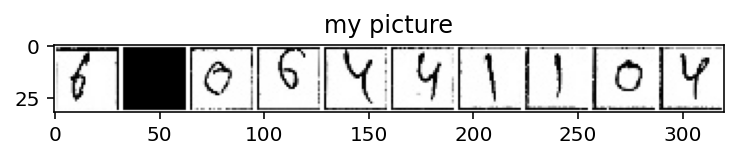

In [ ]:
plt.imshow(x_data[])
plt.title('my picture')
plt.show()

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
ans  = model.predict(x_data[2].reshape(1,32,320,3))
